# Introduction
 - we have to find out the impact of each marketing strategy for each company

### 1. Data Loading and Quality Check

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import scipy.stats


# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
file = pd.read_csv('G:\Work\Data analyst\campagin project python\Campaign-Data.csv')
file.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [3]:
file.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

- Here `amount collected` is the target column
- `  'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5'` these are the feature to work on

### 2. Feature Engineering

In [4]:
# extracting time from the dataset
file['Calendardate'] = pd.to_datetime(file['Calendardate'])
file['year'] = file['Calendardate'].dt.year
file['month'] = file['Calendardate'].dt.month

### 3. EDA

In [23]:
file.groupby('year')['Number of Customers','Amount Collected','Client Type'].sum()

,Number of Customers,Amount Collected
year,,
2014,2167920,12419131028
2015,2167920,38185960072


In [32]:
file.groupby('Client Type')['Amount Collected','Number of Customers'].sum()

,Amount Collected,Number of Customers
Client Type,,
Large Facility,27358365140,1888992
Medium Facility,20543023704,1986144
Private Facility,1327984928,105792
Small Facility,1375717328,354912


In [36]:
file["Client Type"].value_counts(normalize=True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [40]:
# bujhi nai, study
pd.crosstab(file['Client Type'],file['Number of Competition'],margins=True,normalize='columns')

Number of Competition,High,Low,All
Client Type,,,
Large Facility,0.459677,0.459677,0.459677
Medium Facility,0.169355,0.169355,0.169355
Private Facility,0.088710,0.088710,0.088710
Small Facility,0.282258,0.282258,0.282258


In [44]:
pd.crosstab(file['Client Type'],file['Number of Competition'],normalize=True)

Number of Competition,High,Low
Client Type,,
Large Facility,0.076613,0.383065
Medium Facility,0.028226,0.141129
Private Facility,0.014785,0.073925
Small Facility,0.047043,0.235215


In [49]:
file.groupby('Number of Competition')['Amount Collected'].mean()

Number of Competition
High    2.974789e+07
Low     1.445570e+07
Name: Amount Collected, dtype: float64

<AxesSubplot:>

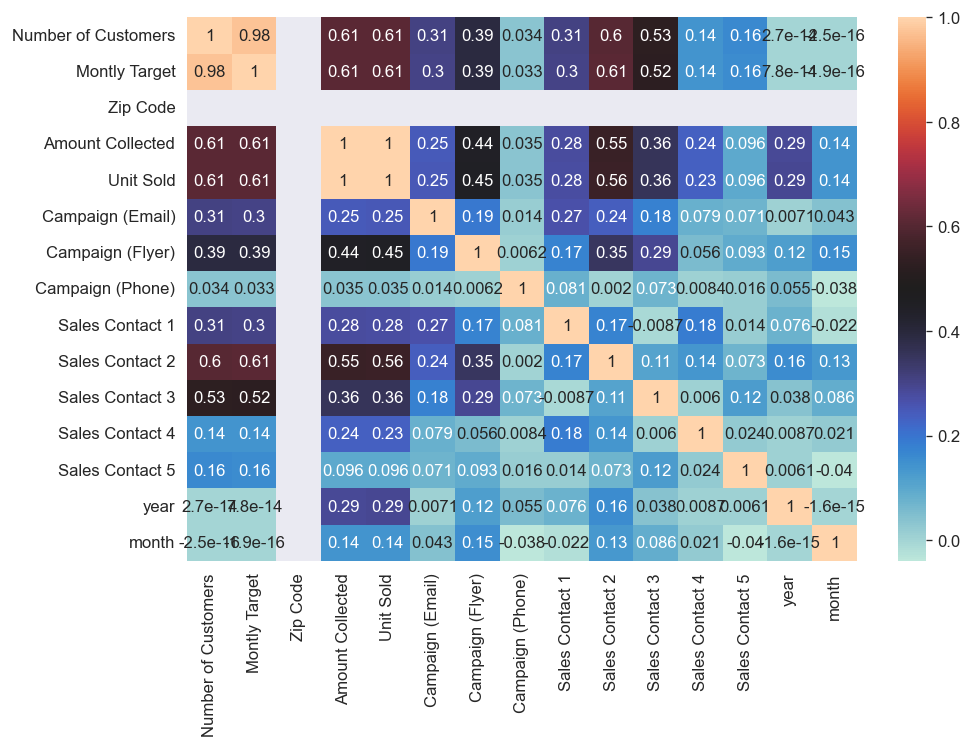

In [72]:
plt.figure(figsize=(9,6),dpi=120)
sns.heatmap(file.corr(),cmap='icefire', annot=True)